<a href="https://colab.research.google.com/github/msmabinaya/abinaya_binaryclass/blob/main/objective_1_continous.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree import DecisionTreeClassifier
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input, Multiply

# Load dataset (Replace 'your_file.csv' with actual file)
df = pd.read_csv('/content/objective_1_datasets.xlsx - Sheet1.csv')

# Drop unnecessary columns (e.g., Name, Section)
df.drop(columns=['NAME', 'SECTION', 'no_labeli'], inplace=True, errors='ignore')

# Encode categorical labels
label_encoder = LabelEncoder()
df['LABEL'] = label_encoder.fit_transform(df['LABEL'])

# Split dataset
X = df.drop(columns=['LABEL'])
y = df['LABEL']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define Functional Model with Attention
input_layer = Input(shape=(X_train.shape[1],))
x = Dense(64, activation='relu')(input_layer)
x = Dense(32, activation='relu')(x)
attention_weights = Dense(X_train.shape[1], activation='softmax', name='attention_layer')(x)
weighted_features = Multiply()([input_layer, attention_weights])
x = Dense(16, activation='relu')(weighted_features)
output_layer = Dense(len(np.unique(y_train)), activation='softmax')(x)

# Create Model
model = Model(inputs=input_layer, outputs=output_layer)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=20, batch_size=8, validation_data=(X_test, y_test))

# Extract Attention Weights
attention_model = Model(inputs=model.input, outputs=model.get_layer('attention_layer').output)
attention_weights = attention_model.predict(X_train)

# Compute feature importance based on attention scores
feature_importance = np.mean(attention_weights, axis=0)

# Train Decision Tree with weighted features
X_train_weighted = X_train * feature_importance
X_test_weighted = X_test * feature_importance

dt = DecisionTreeClassifier(max_depth=5, random_state=42)
dt.fit(X_train_weighted, y_train)

# Evaluate
accuracy = dt.score(X_test_weighted, y_test)
print(f'Hybrid Attention-Based Decision Tree Accuracy: {accuracy * 100:.2f}%')

Epoch 1/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - accuracy: 0.3030 - loss: nan - val_accuracy: 0.2619 - val_loss: nan
Epoch 2/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3135 - loss: nan - val_accuracy: 0.2619 - val_loss: nan
Epoch 3/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.2525 - loss: nan - val_accuracy: 0.2619 - val_loss: nan
Epoch 4/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.2513 - loss: nan - val_accuracy: 0.2619 - val_loss: nan
Epoch 5/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.2874 - loss: nan - val_accuracy: 0.2619 - val_loss: nan
Epoch 6/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2540 - loss: nan - val_accuracy: 0.2619 - val_loss: nan
Epoch 7/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2616 - loss: nan - val_accuracy: 0.2619 - val_loss: nan
Epoch 8/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3236 - loss: nan - val_accuracy: 0.2619 - val_loss: nan
Epoch 9/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 

In [11]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.impute import SimpleImputer
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input, Multiply, Dropout

# Load dataset (Replace 'your_file.csv' with actual file)
df = pd.read_csv('/content/objective_1_datasets.xlsx - Sheet1.csv')

# Drop unnecessary columns (e.g., Name, Section)
df.drop(columns=['NAME', 'SECTION', 'no_labeli'], inplace=True, errors='ignore')

# Encode categorical labels
label_encoder = LabelEncoder()
df['LABEL'] = label_encoder.fit_transform(df['LABEL'])

# Handle missing values by replacing NaNs with column mean
imputer = SimpleImputer(strategy='mean')
df.iloc[:, :-1] = imputer.fit_transform(df.iloc[:, :-1])

# Split dataset
X = df.drop(columns=['LABEL'])
y = df['LABEL']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Balance data using SMOTE
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

# Normalize features for the neural network
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define Functional Model with Attention
input_layer = Input(shape=(X_train.shape[1],))
x = Dense(128, activation='relu')(input_layer)
x = Dropout(0.2)(x)
x = Dense(64, activation='relu')(x)
attention_weights = Dense(X_train.shape[1], activation='softmax', name='attention_layer')(x)
weighted_features = Multiply()([input_layer, attention_weights])
x = Dense(32, activation='relu')(weighted_features)
x = Dropout(0.2)(x)
output_layer = Dense(len(np.unique(y_train)), activation='softmax')(x)

# Create Model
model = Model(inputs=input_layer, outputs=output_layer)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history=model.fit(X_train_scaled, y_train, epochs=50, batch_size=16, validation_data=(X_test_scaled, y_test))

# Extract Attention Weights
attention_model = Model(inputs=model.input, outputs=model.get_layer('attention_layer').output)
attention_weights = attention_model.predict(X_train_scaled)

# Compute feature importance based on attention scores
feature_importance = np.mean(attention_weights, axis=0)

# Train Random Forest with weighted features
X_train_weighted = X_train * feature_importance
X_test_weighted = X_test * feature_importance

rf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
rf.fit(X_train_weighted, y_train)

# Evaluate
accuracy = rf.score(X_test_weighted, y_test)
print(f'Hybrid Attention-Based Random Forest Accuracy: {accuracy * 100:.2f}%')


Epoch 1/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step - accuracy: 0.3278 - loss: 1.5776 - val_accuracy: 0.3690 - val_loss: 1.5249
Epoch 2/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.3921 - loss: 1.4596 - val_accuracy: 0.3929 - val_loss: 1.4257
Epoch 3/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.5259 - loss: 1.3253 - val_accuracy: 0.4881 - val_loss: 1.3130
Epoch 4/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.5978 - loss: 1.1793 - val_accuracy: 0.5476 - val_loss: 1.1998
Epoch 5/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.6193 - loss: 1.0624 - val_accuracy: 0.5476 - val_loss: 1.1048
Epoch 6/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.6851 - loss: 0.9433 - val_accuracy: 0.6071 - val_loss: 1.0193
Epoch 7/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.7005 - loss: 0.8337 - val_accuracy: 0.5952 - val_loss: 0.9386
Epoch 8/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6700 - loss: 0.7852 - val_accuracy: 0.6190 - val

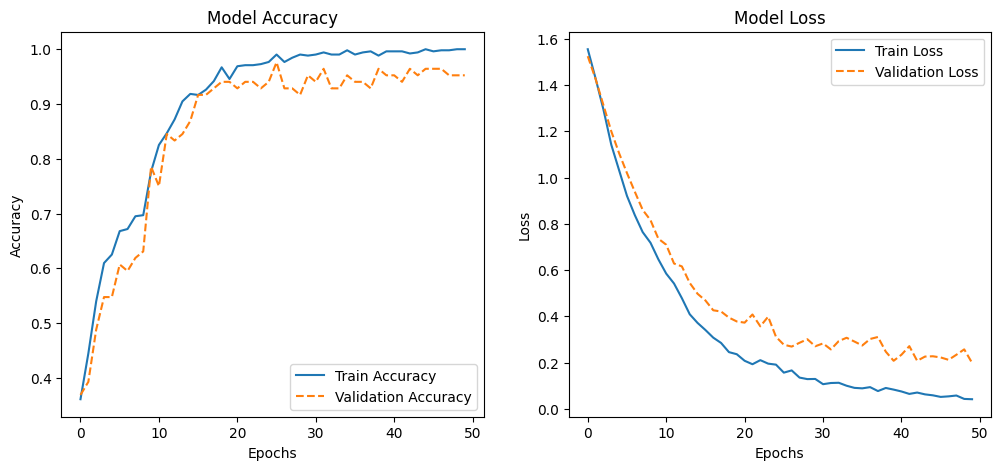

In [12]:
import matplotlib.pyplot as plt

# Check if history exists
if 'history' in locals() and history is not None:
    # Plot Training & Validation Accuracy
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(history.history.get('accuracy', []), label='Train Accuracy')
    plt.plot(history.history.get('val_accuracy', []), label='Validation Accuracy', linestyle='dashed')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Model Accuracy')
    plt.legend()

    # Plot Training & Validation Loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history.get('loss', []), label='Train Loss')
    plt.plot(history.history.get('val_loss', []), label='Validation Loss', linestyle='dashed')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Model Loss')
    plt.legend()

    plt.show()
else:
    print("Error: Model history is not available. Ensure you store history during training.")


Epoch 1/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.2480 - loss: 1.6029 - val_accuracy: 0.3452 - val_loss: 1.5600
Epoch 2/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.4168 - loss: 1.5315 - val_accuracy: 0.3690 - val_loss: 1.5052
Epoch 3/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.4897 - loss: 1.4282 - val_accuracy: 0.3929 - val_loss: 1.4071
Epoch 4/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6151 - loss: 1.2928 - val_accuracy: 0.6429 - val_loss: 1.2772
Epoch 5/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6831 - loss: 1.1324 - val_accuracy: 0.6667 - val_loss: 1.1483
Epoch 6/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7428 - loss: 0.9780 - val_accuracy: 0.6905 - val_loss: 1.0328
Epoch 7/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7482 - loss: 0.9104 - val_accuracy: 0.7024 - val_loss: 0.9446
Epoch 8/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7776 - loss: 0.8229 - val_accuracy: 0.7024 - val_lo

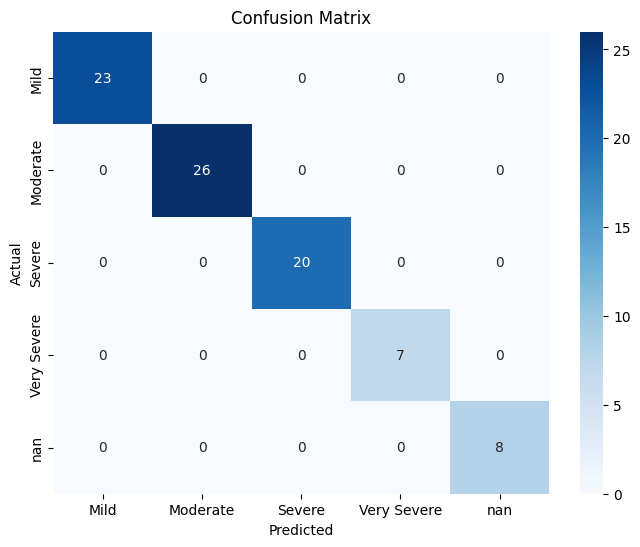

              precision    recall  f1-score   support

        Mild       1.00      1.00      1.00        23
    Moderate       1.00      1.00      1.00        26
      Severe       1.00      1.00      1.00        20
 Very Severe       1.00      1.00      1.00         7
         nan       1.00      1.00      1.00         8

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84



In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.impute import SimpleImputer
from sklearn.metrics import confusion_matrix, classification_report
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input, Multiply, Dropout

# Load dataset (Replace 'your_file.csv' with actual file)
df = pd.read_csv('/content/objective_1_datasets.xlsx - Sheet1.csv')

# Drop unnecessary columns (e.g., Name, Section)
df.drop(columns=['NAME', 'SECTION', 'no_labeli'], inplace=True, errors='ignore')

# Encode categorical labels
label_encoder = LabelEncoder()
df['LABEL'] = label_encoder.fit_transform(df['LABEL'])

# Handle missing values by replacing NaNs with column mean
imputer = SimpleImputer(strategy='mean')
df.iloc[:, :-1] = imputer.fit_transform(df.iloc[:, :-1])

# Split dataset
X = df.drop(columns=['LABEL'])
y = df['LABEL']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Balance data using SMOTE
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

# Normalize features for the neural network
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define Functional Model with Attention
input_layer = Input(shape=(X_train.shape[1],))
x = Dense(128, activation='relu')(input_layer)
x = Dropout(0.2)(x)
x = Dense(64, activation='relu')(x)
attention_weights = Dense(X_train.shape[1], activation='softmax', name='attention_layer')(x)
weighted_features = Multiply()([input_layer, attention_weights])
x = Dense(32, activation='relu')(weighted_features)
x = Dropout(0.2)(x)
output_layer = Dense(len(np.unique(y_train)), activation='softmax')(x)

# Create Model
model = Model(inputs=input_layer, outputs=output_layer)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train_scaled, y_train, epochs=50, batch_size=16, validation_data=(X_test_scaled, y_test))

# Extract Attention Weights
attention_model = Model(inputs=model.input, outputs=model.get_layer('attention_layer').output)
attention_weights = attention_model.predict(X_train_scaled)

# Compute feature importance based on attention scores
feature_importance = np.mean(attention_weights, axis=0)

# Train Random Forest with weighted features
X_train_weighted = X_train * feature_importance
X_test_weighted = X_test * feature_importance

rf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
rf.fit(X_train_weighted, y_train)

# Evaluate
accuracy = rf.score(X_test_weighted, y_test)
print(f'Hybrid Attention-Based Random Forest Accuracy: {accuracy * 100:.2f}%')

# Predict and generate confusion matrix
y_pred = rf.predict(X_test_weighted)
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print classification report
print(classification_report(y_test, y_pred, target_names=[str(c) for c in label_encoder.classes_]))


In [19]:
!pip install mlflow
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mlflow
import mlflow.sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, precision_recall_curve, roc_curve
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input, Multiply, Dropout

# Load dataset
df = pd.read_csv('/content/objective_1_datasets.xlsx - Sheet1.csv')

# Drop unnecessary columns
df.drop(columns=['NAME', 'SECTION', 'no_labeli'], inplace=True, errors='ignore')

# Encode categorical labels
label_encoder = LabelEncoder()
df['LABEL'] = label_encoder.fit_transform(df['LABEL'])

# Handle missing values by replacing NaNs with column mean
imputer = SimpleImputer(strategy='mean')
df.iloc[:, :-1] = imputer.fit_transform(df.iloc[:, :-1])

# Split dataset
X = df.drop(columns=['LABEL'])
y = df['LABEL']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Balance data using SMOTE
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

# Normalize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Hybrid Attention-Based Random Forest Model ###
input_layer = Input(shape=(X_train.shape[1],))
x = Dense(128, activation='relu')(input_layer)
x = Dropout(0.2)(x)
x = Dense(64, activation='relu')(x)
attention_weights = Dense(X_train.shape[1], activation='softmax', name='attention_layer')(x)
weighted_features = Multiply()([input_layer, attention_weights])
x = Dense(32, activation='relu')(weighted_features)
x = Dropout(0.2)(x)
output_layer = Dense(len(np.unique(y_train)), activation='softmax')(x)

# Create Model
model = Model(inputs=input_layer, outputs=output_layer)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train Model
history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=16, validation_data=(X_test_scaled, y_test))

# Extract Attention Weights
attention_model = Model(inputs=model.input, outputs=model.get_layer('attention_layer').output)
attention_weights = attention_model.predict(X_train_scaled)

# Compute feature importance based on attention scores
feature_importance = np.mean(attention_weights, axis=0)

# Train Random Forest with weighted features
X_train_weighted = X_train * feature_importance
X_test_weighted = X_test * feature_importance

rf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
rf.fit(X_train_weighted, y_train)

# Compare with Other Models
models = {
    "Hybrid Attention + RF": rf,
    "Support Vector Machine": SVC(probability=True),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
}

# MLflow Tracking
mlflow.set_experiment("Hybrid_Attention_Classification")

for model_name, model in models.items():
    with mlflow.start_run(run_name=model_name):
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        y_prob = model.predict_proba(X_test) if hasattr(model, "predict_proba") else None

        accuracy = model.score(X_test, y_test)
        print(f"{model_name} Accuracy: {accuracy * 100:.2f}%")

        cm = confusion_matrix(y_test, y_pred)
        print(classification_report(y_test, y_pred, target_names=[str(c) for c in label_encoder.classes_]))

        # Log Metrics
        mlflow.log_param("Model", model_name)
        mlflow.log_metric("Accuracy", accuracy)

        # ROC-AUC
        if y_prob is not None:
            roc_auc = roc_auc_score(y_test, y_prob, multi_class='ovr')
            mlflow.log_metric("ROC-AUC", roc_auc)

        # Precision-Recall Curve
        if y_prob is not None:
            precision, recall, _ = precision_recall_curve(y_test, y_prob[:, 1])
            plt.figure()
            plt.plot(recall, precision, marker='.')
            plt.xlabel('Recall')
            plt.ylabel('Precision')
            plt.title(f'Precision-Recall Curve ({model_name})')
            plt.show()

        # Confusion Matrix
        plt.figure(figsize=(8, 6))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.title(f'Confusion Matrix ({model_name})')
        plt.show()

        mlflow.sklearn.log_model(model, model_name)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 28.2/28.2 MB 33.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.1/6.1 MB 67.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 231.8/231.8 kB 15.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 kB 11.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.9/114.9 kB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 677.5/677.5 kB 33.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.9/94.9 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.4/203.4 kB 15.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 6.0 MB/s eta 0:00:00
Epoch 1/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step

2025/03/20 04:19:57 INFO mlflow.tracking.fluent: Experiment with name 'Hybrid_Attention_Classification' does not exist. Creating a new experiment.


Hybrid Attention + RF Accuracy: 100.00%
              precision    recall  f1-score   support

        Mild       1.00      1.00      1.00        23
    Moderate       1.00      1.00      1.00        26
      Severe       1.00      1.00      1.00        20
 Very Severe       1.00      1.00      1.00         7
         nan       1.00      1.00      1.00         8

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84



ValueError: multiclass format is not supported

Epoch 1/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step - accuracy: 0.2511 - loss: 1.6066 - val_accuracy: 0.2738 - val_loss: 1.5752
Epoch 2/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 55ms/step - accuracy: 0.4235 - loss: 1.5110 - val_accuracy: 0.2143 - val_loss: 1.5338
Epoch 3/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.4208 - loss: 1.4237 - val_accuracy: 0.3095 - val_loss: 1.4784
Epoch 4/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4954 - loss: 1.3124 - val_accuracy: 0.3452 - val_loss: 1.4000
Epoch 5/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5120 - loss: 1.2102 - val_accuracy: 0.3929 - val_loss: 1.3039
Epoch 6/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6009 - loss: 1.1030 - val_accuracy: 0.4762 - val_loss: 1.2118
Epoch 7/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6816 - loss: 0.9741 - val_accuracy: 0.4881 - val_loss: 1.1252
Epoch 8/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6622 - loss: 0.8976 - val_accuracy: 0.6071 - val_los

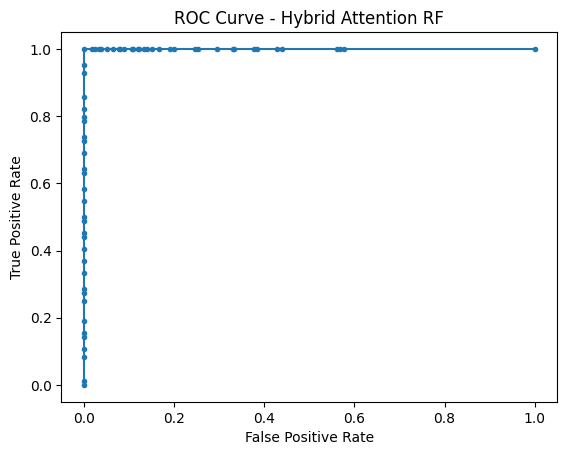

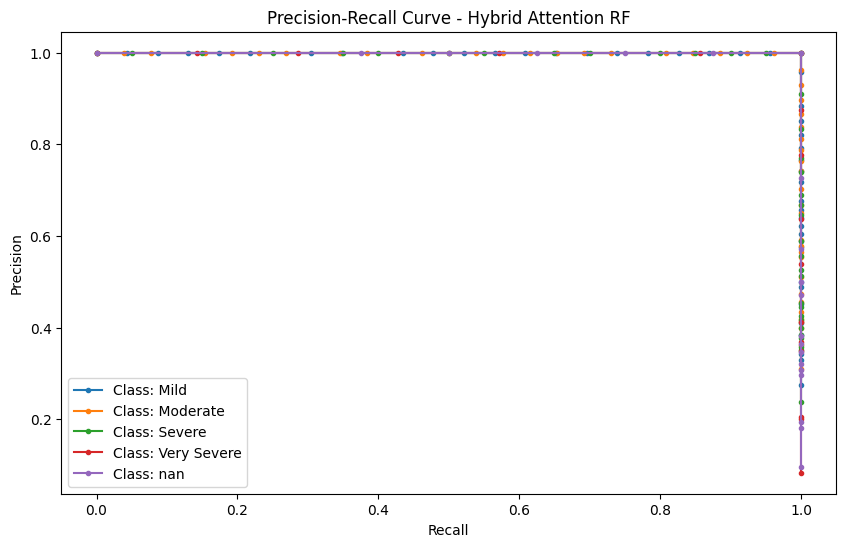

2025/03/20 04:22:02 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


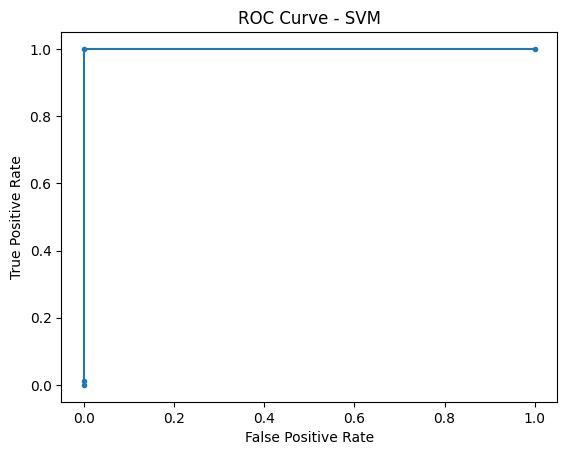

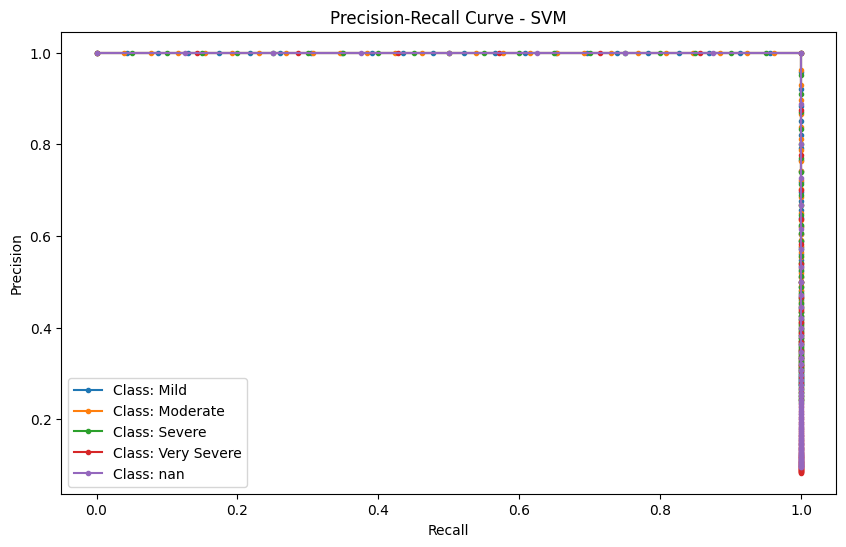

2025/03/20 04:22:13 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


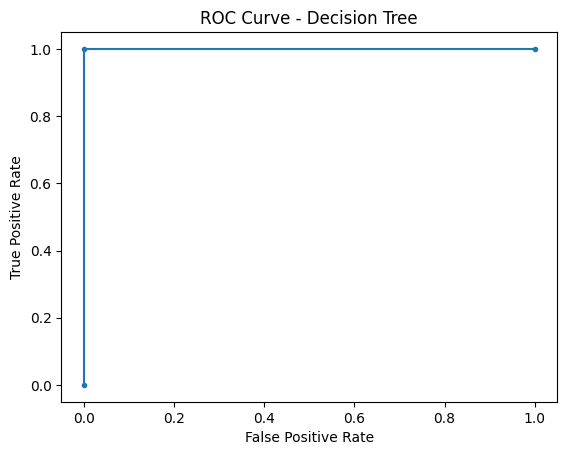

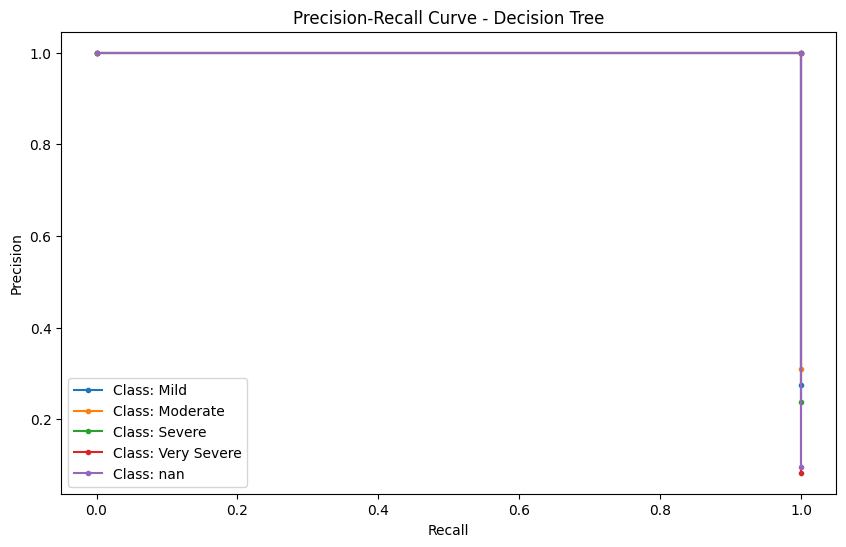

2025/03/20 04:22:20 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:22:21] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


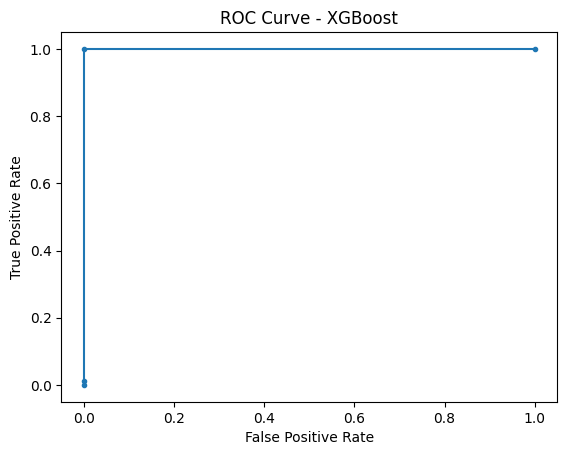

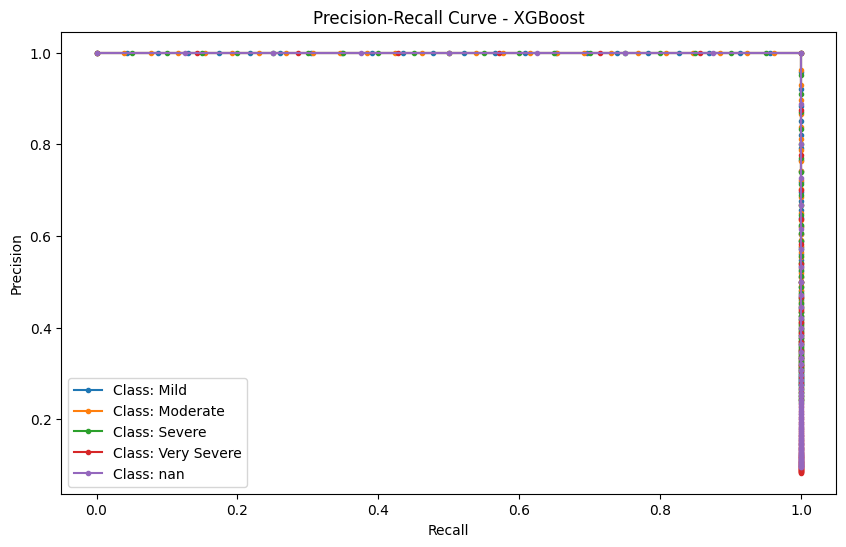

2025/03/20 04:22:29 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.



Model: Hybrid Attention RF
Accuracy: 1.0000
Confusion Matrix:
 [[23  0  0  0  0]
 [ 0 26  0  0  0]
 [ 0  0 20  0  0]
 [ 0  0  0  7  0]
 [ 0  0  0  0  8]]
Classification Report:
               precision    recall  f1-score   support

        Mild       1.00      1.00      1.00        23
    Moderate       1.00      1.00      1.00        26
      Severe       1.00      1.00      1.00        20
 Very Severe       1.00      1.00      1.00         7
         nan       1.00      1.00      1.00         8

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84


Model: SVM
Accuracy: 1.0000
Confusion Matrix:
 [[23  0  0  0  0]
 [ 0 26  0  0  0]
 [ 0  0 20  0  0]
 [ 0  0  0  7  0]
 [ 0  0  0  0  8]]
Classification Report:
               precision    recall  f1-score   support

        Mild       1.00      1.00      1.00        23
    Moderate       1.00      1.00      1.00        26
      

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mlflow
import mlflow.sklearn

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, label_binarize
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from sklearn.impute import SimpleImputer
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, precision_recall_curve, auc

import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input, Multiply, Dropout

# Load dataset
df = pd.read_csv('/content/objective_1_datasets.xlsx - Sheet1.csv')

# Drop unnecessary columns
df.drop(columns=['NAME', 'SECTION', 'no_labeli'], inplace=True, errors='ignore')

# Encode categorical labels
label_encoder = LabelEncoder()
df['LABEL'] = label_encoder.fit_transform(df['LABEL'])

# Handle missing values by replacing NaNs with column mean
imputer = SimpleImputer(strategy='mean')
df.iloc[:, :-1] = imputer.fit_transform(df.iloc[:, :-1])

# Split dataset
X = df.drop(columns=['LABEL'])
y = df['LABEL']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Balance data using SMOTE
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

# Normalize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define Functional Model with Attention
input_layer = Input(shape=(X_train.shape[1],))
x = Dense(128, activation='relu')(input_layer)
x = Dropout(0.2)(x)
x = Dense(64, activation='relu')(x)
attention_weights = Dense(X_train.shape[1], activation='softmax', name='attention_layer')(x)
weighted_features = Multiply()([input_layer, attention_weights])
x = Dense(32, activation='relu')(weighted_features)
x = Dropout(0.2)(x)
output_layer = Dense(len(np.unique(y_train)), activation='softmax')(x)

# Create Model
model = Model(inputs=input_layer, outputs=output_layer)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=16, validation_data=(X_test_scaled, y_test))

# Extract Attention Weights
attention_model = Model(inputs=model.input, outputs=model.get_layer('attention_layer').output)
attention_weights = attention_model.predict(X_train_scaled)

# Compute feature importance based on attention scores
feature_importance = np.mean(attention_weights, axis=0)

# Train Random Forest with weighted features
X_train_weighted = X_train * feature_importance
X_test_weighted = X_test * feature_importance

rf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
rf.fit(X_train_weighted, y_train)

# Compare with Other Models
models = {
    "Hybrid Attention RF": rf,
    "SVM": SVC(probability=True, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
}

# Store results
results = {}

mlflow.set_experiment("Hybrid_Attention_Classification")

for model_name, clf in models.items():
    with mlflow.start_run(run_name=model_name):
        # Train model
        clf.fit(X_train_weighted, y_train)

        # Predict
        y_pred = clf.predict(X_test_weighted)
        y_prob = clf.predict_proba(X_test_weighted) if hasattr(clf, "predict_proba") else None

        # Metrics
        acc = clf.score(X_test_weighted, y_test)
        cm = confusion_matrix(y_test, y_pred)
        classification_rep = classification_report(y_test, y_pred, target_names=[str(c) for c in label_encoder.classes_])

        results[model_name] = {
            "accuracy": acc,
            "confusion_matrix": cm,
            "classification_report": classification_rep
        }

        # ROC-AUC
        y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
        if y_prob is not None:
            roc_auc = roc_auc_score(y_test_bin, y_prob, multi_class="ovr")
            fpr, tpr, _ = roc_curve(y_test_bin.ravel(), y_prob.ravel())

            plt.figure()
            plt.plot(fpr, tpr, marker='.')
            plt.xlabel('False Positive Rate')
            plt.ylabel('True Positive Rate')
            plt.title(f'ROC Curve - {model_name}')
            plt.show()
        else:
            roc_auc = None

        # Precision-Recall Curve
        if y_prob is not None:
            plt.figure(figsize=(10, 6))
            for i, class_name in enumerate(label_encoder.classes_):
                if y_prob.shape[1] > 1:
                    precision, recall, _ = precision_recall_curve(y_test_bin[:, i], y_prob[:, i])
                    plt.plot(recall, precision, marker='.', label=f'Class: {class_name}')
            plt.xlabel('Recall')
            plt.ylabel('Precision')
            plt.title(f'Precision-Recall Curve - {model_name}')
            plt.legend()
            plt.show()

        # Log Metrics in MLflow
        mlflow.log_metric("Accuracy", acc)
        if roc_auc is not None:
            mlflow.log_metric("ROC-AUC", roc_auc)

        mlflow.sklearn.log_model(clf, model_name)

# Print final results
for model_name, metrics in results.items():
    print(f"\nModel: {model_name}")
    print(f"Accuracy: {metrics['accuracy']:.4f}")
    print("Confusion Matrix:\n", metrics["confusion_matrix"])
    print("Classification Report:\n", metrics["classification_report"])


Epoch 1/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 8s 58ms/step - accuracy: 0.3145 - loss: 1.5966 - val_accuracy: 0.2262 - val_loss: 1.5754
Epoch 2/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.5250 - loss: 1.4994 - val_accuracy: 0.2143 - val_loss: 1.5078
Epoch 3/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.4458 - loss: 1.3650 - val_accuracy: 0.2976 - val_loss: 1.4162
Epoch 4/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.5533 - loss: 1.2436 - val_accuracy: 0.3810 - val_loss: 1.3296
Epoch 5/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.5713 - loss: 1.1401 - val_accuracy: 0.4167 - val_loss: 1.2473
Epoch 6/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.6455 - loss: 1.0094 - val_accuracy: 0.5000 - val_loss: 1.1458
Epoch 7/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.6885 - loss: 0.8869 - val_accuracy: 0.4881 - val_loss: 1.0996
Epoch 8/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7159 - loss: 0.8325 - val_accuracy: 0.5476 - va

2025/03/20 04:23:14 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2025/03/20 04:23:18 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2025/03/20 04:23:23 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:23:23] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
2025/03/20 04:23:27 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


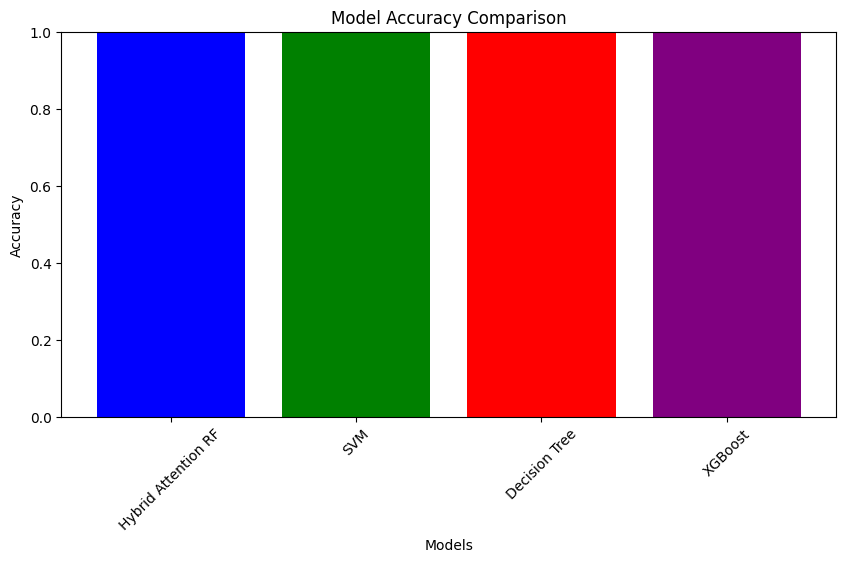

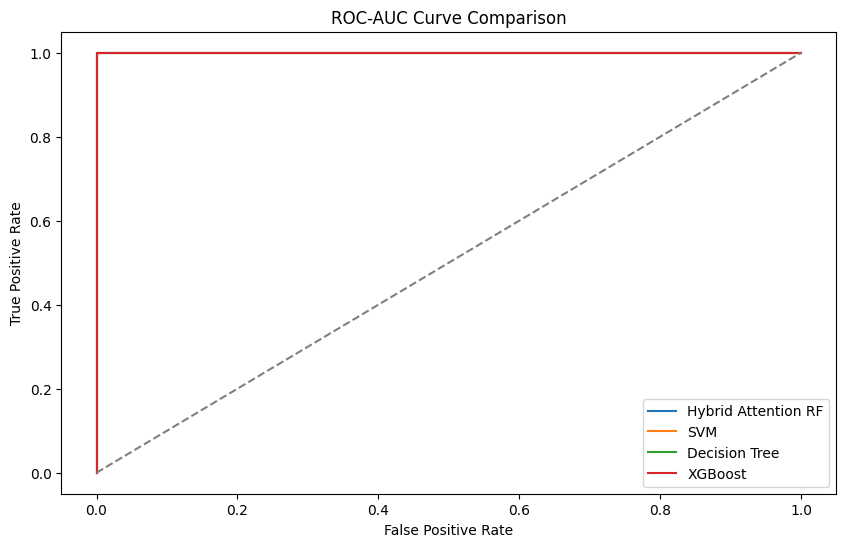

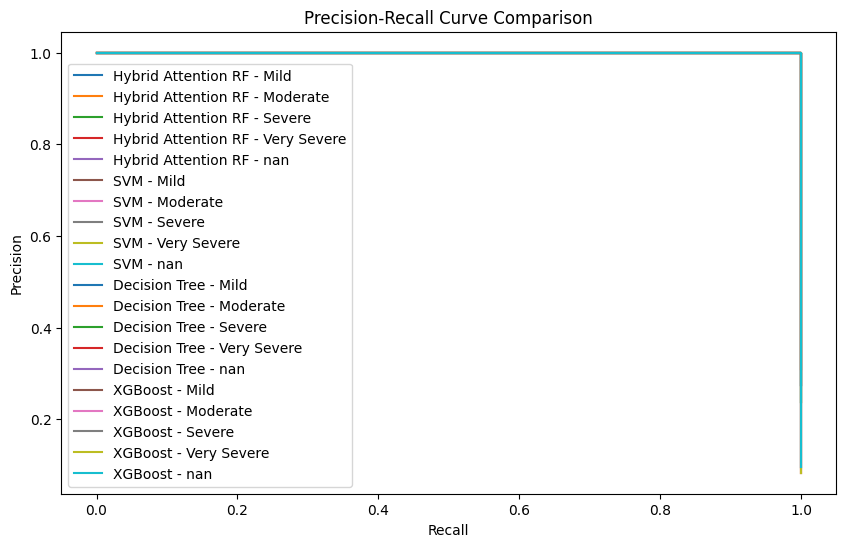

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mlflow
import mlflow.sklearn

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, label_binarize
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from sklearn.impute import SimpleImputer
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, precision_recall_curve, auc

import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input, Multiply, Dropout

# Load dataset
df = pd.read_csv('/content/objective_1_datasets.xlsx - Sheet1.csv')

# Drop unnecessary columns
df.drop(columns=['NAME', 'SECTION', 'no_labeli'], inplace=True, errors='ignore')

# Encode categorical labels
label_encoder = LabelEncoder()
df['LABEL'] = label_encoder.fit_transform(df['LABEL'])

# Handle missing values
imputer = SimpleImputer(strategy='mean')
df.iloc[:, :-1] = imputer.fit_transform(df.iloc[:, :-1])

# Split dataset
X = df.drop(columns=['LABEL'])
y = df['LABEL']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Balance data using SMOTE
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

# Normalize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define Functional Model with Attention
input_layer = Input(shape=(X_train.shape[1],))
x = Dense(128, activation='relu')(input_layer)
x = Dropout(0.2)(x)
x = Dense(64, activation='relu')(x)
attention_weights = Dense(X_train.shape[1], activation='softmax', name='attention_layer')(x)
weighted_features = Multiply()([input_layer, attention_weights])
x = Dense(32, activation='relu')(weighted_features)
x = Dropout(0.2)(x)
output_layer = Dense(len(np.unique(y_train)), activation='softmax')(x)

# Create Model
model = Model(inputs=input_layer, outputs=output_layer)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train_scaled, y_train, epochs=50, batch_size=16, validation_data=(X_test_scaled, y_test))

# Extract Attention Weights
attention_model = Model(inputs=model.input, outputs=model.get_layer('attention_layer').output)
attention_weights = attention_model.predict(X_train_scaled)

# Compute feature importance
feature_importance = np.mean(attention_weights, axis=0)

# Train Random Forest with weighted features
X_train_weighted = X_train * feature_importance
X_test_weighted = X_test * feature_importance

# Compare Models
models = {
    "Hybrid Attention RF": RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42),
    "SVM": SVC(probability=True, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
}

# Store results
results = {}
accuracies = []
roc_curves = {}
pr_curves = {}

mlflow.set_experiment("Hybrid_Attention_Classification")

for model_name, clf in models.items():
    with mlflow.start_run(run_name=model_name):
        # Train model
        clf.fit(X_train_weighted, y_train)

        # Predict
        y_pred = clf.predict(X_test_weighted)
        y_prob = clf.predict_proba(X_test_weighted) if hasattr(clf, "predict_proba") else None

        # Compute Metrics
        acc = clf.score(X_test_weighted, y_test)
        accuracies.append((model_name, acc))
        cm = confusion_matrix(y_test, y_pred)
        classification_rep = classification_report(y_test, y_pred, target_names=[str(c) for c in label_encoder.classes_])

        # ROC-AUC
        y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
        if y_prob is not None:
            roc_auc = roc_auc_score(y_test_bin, y_prob, multi_class="ovr")
            fpr, tpr, _ = roc_curve(y_test_bin.ravel(), y_prob.ravel())
            roc_curves[model_name] = (fpr, tpr)

        # Precision-Recall Curve
        if y_prob is not None:
            pr_curves[model_name] = {}
            for i, class_name in enumerate(label_encoder.classes_):
                precision, recall, _ = precision_recall_curve(y_test_bin[:, i], y_prob[:, i])
                pr_curves[model_name][class_name] = (recall, precision)

        # Log Metrics in MLflow
        mlflow.log_metric("Accuracy", acc)
        if y_prob is not None:
            mlflow.log_metric("ROC-AUC", roc_auc)

        mlflow.sklearn.log_model(clf, model_name)

# Plot Accuracy Comparison
plt.figure(figsize=(10, 5))
model_names, acc_values = zip(*accuracies)
plt.bar(model_names, acc_values, color=['blue', 'green', 'red', 'purple'])
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Model Accuracy Comparison")
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.show()

# Plot ROC-AUC Curves
plt.figure(figsize=(10, 6))
for model_name, (fpr, tpr) in roc_curves.items():
    plt.plot(fpr, tpr, label=model_name)
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC-AUC Curve Comparison")
plt.legend()
plt.show()

# Plot Precision-Recall Curves
plt.figure(figsize=(10, 6))
for model_name, class_curves in pr_curves.items():
    for class_name, (recall, precision) in class_curves.items():
        plt.plot(recall, precision, label=f"{model_name} - {class_name}")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve Comparison")
plt.legend()
plt.show()


Random Forest - Cross-Validation Accuracies: [1.         0.98809524 0.98809524 1.         1.        ]
Random Forest - Mean Accuracy: 0.9952
SVM - Cross-Validation Accuracies: [1. 1. 1. 1. 1.]
SVM - Mean Accuracy: 1.0000
Decision Tree - Cross-Validation Accuracies: [1. 1. 1. 1. 1.]
Decision Tree - Mean Accuracy: 1.0000


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:24:19] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:24:19] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:24:20] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:24:20] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost - Cross-Validation Accuracies: [1. 1. 1. 1. 1.]
XGBoost - Mean Accuracy: 1.0000


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:24:20] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


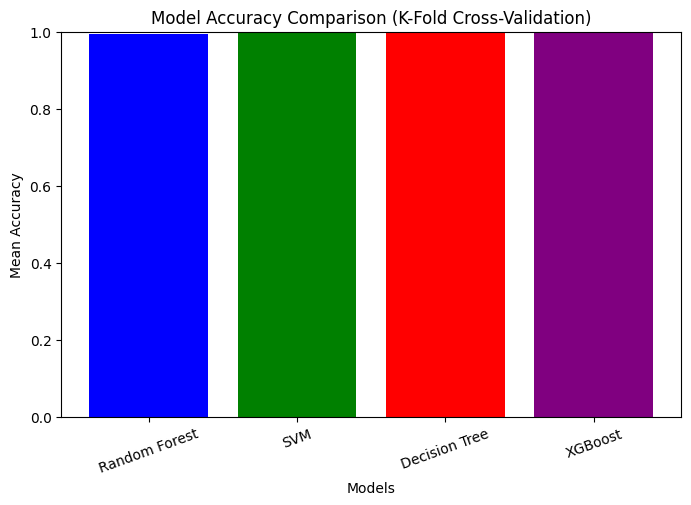

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import KFold, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report, confusion_matrix

# Load dataset
df = pd.read_csv('/content/objective_1_datasets.xlsx - Sheet1.csv')

# Drop unnecessary columns
df.drop(columns=['NAME', 'SECTION', 'no_labeli'], inplace=True, errors='ignore')

# Encode categorical labels
label_encoder = LabelEncoder()
df['LABEL'] = label_encoder.fit_transform(df['LABEL'])

# Handle missing values by replacing NaNs with column mean
imputer = SimpleImputer(strategy='mean')
df.iloc[:, :-1] = imputer.fit_transform(df.iloc[:, :-1])

# Split features and target
X = df.drop(columns=['LABEL'])
y = df['LABEL']

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define models
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "SVM": SVC(kernel='linear', probability=True, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
}

# K-Fold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
accuracy_scores = {}

for model_name, model in models.items():
    scores = cross_val_score(model, X_scaled, y, cv=kf, scoring='accuracy')
    accuracy_scores[model_name] = np.mean(scores)
    print(f"{model_name} - Cross-Validation Accuracies: {scores}")
    print(f"{model_name} - Mean Accuracy: {np.mean(scores):.4f}")

# Plot accuracy comparison
plt.figure(figsize=(8,5))
plt.bar(accuracy_scores.keys(), accuracy_scores.values(), color=['blue', 'green', 'red', 'purple'])
plt.xlabel("Models")
plt.ylabel("Mean Accuracy")
plt.title("Model Accuracy Comparison (K-Fold Cross-Validation)")
plt.xticks(rotation=20)
plt.ylim(0, 1)
plt.show()


Epoch 1/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 8s 46ms/step - accuracy: 0.2322 - loss: 1.6065 - val_accuracy: 0.5119 - val_loss: 1.5780
Epoch 2/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.4768 - loss: 1.5684 - val_accuracy: 0.5833 - val_loss: 1.5305
Epoch 3/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5079 - loss: 1.5161 - val_accuracy: 0.5238 - val_loss: 1.4747
Epoch 4/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.5410 - loss: 1.4559 - val_accuracy: 0.6190 - val_loss: 1.4058
Epoch 5/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.5672 - loss: 1.3976 - val_accuracy: 0.6667 - val_loss: 1.3225
Epoch 6/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6356 - loss: 1.3215 - val_accuracy: 0.7381 - val_loss: 1.2299
Epoch 7/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.7657 - loss: 1.2150 - val_accuracy: 0.7500 - val_loss: 1.1391
Epoch 8/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7480 - loss: 1.1249 - val_accuracy: 0.7262 - va

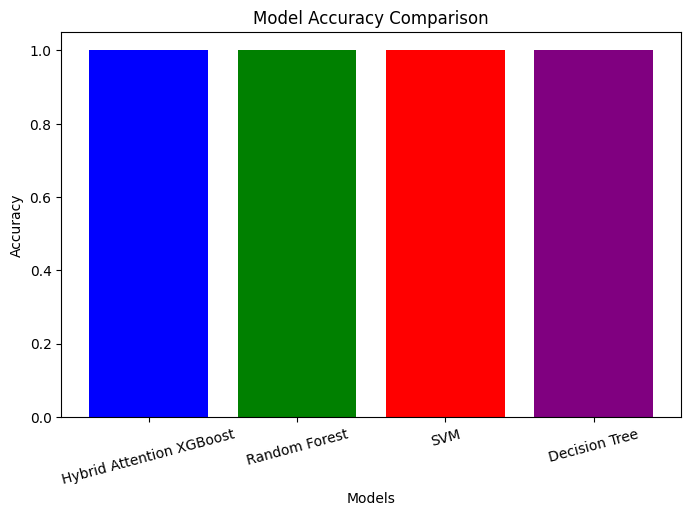

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, precision_recall_curve, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input, Multiply, Dropout

# Load dataset
df = pd.read_csv('/content/objective_1_datasets.xlsx - Sheet1.csv')

# Drop unnecessary columns
df.drop(columns=['NAME', 'SECTION', 'no_labeli'], inplace=True, errors='ignore')

# Encode categorical labels
label_encoder = LabelEncoder()
df['LABEL'] = label_encoder.fit_transform(df['LABEL'])

# Handle missing values
df.fillna(df.mean(), inplace=True)

# Split dataset
X = df.drop(columns=['LABEL'])
y = df['LABEL']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Normalize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define Functional Model with Attention
input_layer = Input(shape=(X_train.shape[1],))
x = Dense(128, activation='relu')(input_layer)
x = Dropout(0.2)(x)
x = Dense(64, activation='relu')(x)
attention_weights = Dense(X_train.shape[1], activation='softmax', name='attention_layer')(x)
weighted_features = Multiply()([input_layer, attention_weights])
x = Dense(32, activation='relu')(weighted_features)
x = Dropout(0.2)(x)
output_layer = Dense(len(np.unique(y_train)), activation='softmax')(x)

# Create Model
model = Model(inputs=input_layer, outputs=output_layer)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train_scaled, y_train, epochs=50, batch_size=16, validation_data=(X_test_scaled, y_test))

# Extract Attention Weights
attention_model = Model(inputs=model.input, outputs=model.get_layer('attention_layer').output)
attention_weights = attention_model.predict(X_train_scaled)

# Compute feature importance
feature_importance = np.mean(attention_weights, axis=0)

# Train XGBoost with weighted features
X_train_weighted = X_train * feature_importance
X_test_weighted = X_test * feature_importance

xgb_clf = xgb.XGBClassifier(n_estimators=100, max_depth=10, random_state=42)
xgb_clf.fit(X_train_weighted, y_train)

# Model Comparison
models = {
    'Hybrid Attention XGBoost': xgb_clf,
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'SVM': SVC(probability=True, random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42)
}

kf = KFold(n_splits=5, shuffle=True, random_state=42)

accuracies = {}
roc_aucs = {}

for name, model in models.items():
    scores = cross_val_score(model, X_train_weighted, y_train, cv=kf, scoring='accuracy')
    model.fit(X_train_weighted, y_train)
    y_pred = model.predict(X_test_weighted)
    accuracies[name] = accuracy_score(y_test, y_pred)
    y_prob = model.predict_proba(X_test_weighted) if hasattr(model, 'predict_proba') else None
    roc_aucs[name] = roc_auc_score(y_test, y_prob, multi_class='ovr') if y_prob is not None else None
    print(f'\n{name} Classification Report:\n', classification_report(y_test, y_pred))

# Visualization
plt.figure(figsize=(8, 5))
plt.bar(accuracies.keys(), accuracies.values(), color=['blue', 'green', 'red', 'purple'])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.xticks(rotation=15)
plt.show()

Epoch 1/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.2283 - loss: 1.5946 - val_accuracy: 0.2619 - val_loss: 1.5610
Epoch 2/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4238 - loss: 1.4897 - val_accuracy: 0.1786 - val_loss: 1.4959
Epoch 3/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4669 - loss: 1.3491 - val_accuracy: 0.2500 - val_loss: 1.3851
Epoch 4/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5431 - loss: 1.2054 - val_accuracy: 0.5476 - val_loss: 1.2836
Epoch 5/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5967 - loss: 1.0779 - val_accuracy: 0.6071 - val_loss: 1.1988
Epoch 6/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7325 - loss: 0.9988 - val_accuracy: 0.6190 - val_loss: 1.1272
Epoch 7/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7555 - loss: 0.9222 - val_accuracy: 0.5952 - val_loss: 1.0759
Epoch 8/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7549 - loss: 0.8612 - val_accuracy: 0.7024 - val_loss

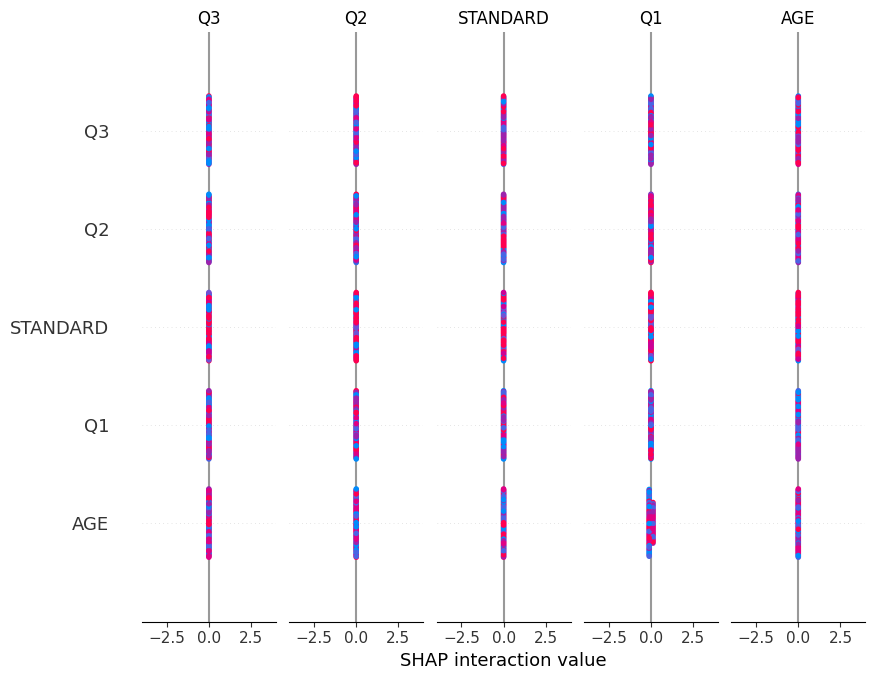

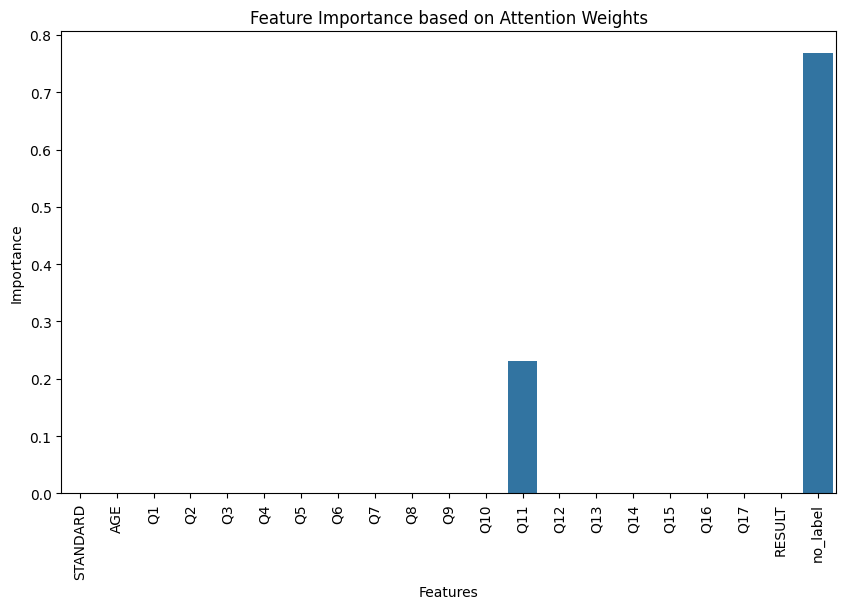

Cross-Validation Scores: [1. 1. 1. 1. 1.]
Mean Accuracy: 1.0


In [25]:
import numpy as np
import pandas as pd
import shap
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
from imblearn.over_sampling import SMOTE
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input, Multiply, Dropout
import xgboost as xgb

# Load dataset
df = pd.read_csv('/content/objective_1_datasets.xlsx - Sheet1.csv')

# Drop unnecessary columns
df.drop(columns=['NAME', 'SECTION', 'no_labeli'], inplace=True, errors='ignore')

# Encode categorical labels
label_encoder = LabelEncoder()
df['LABEL'] = label_encoder.fit_transform(df['LABEL'])

# Handle missing values
df.fillna(df.mean(), inplace=True)

# Split dataset
X = df.drop(columns=['LABEL'])
y = df['LABEL']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Balance data using SMOTE
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

# Normalize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define Functional Model with Attention
input_layer = Input(shape=(X_train.shape[1],))
x = Dense(128, activation='relu')(input_layer)
x = Dropout(0.2)(x)
x = Dense(64, activation='relu')(x)
attention_weights = Dense(X_train.shape[1], activation='softmax', name='attention_layer')(x)
weighted_features = Multiply()([input_layer, attention_weights])
x = Dense(32, activation='relu')(weighted_features)
x = Dropout(0.2)(x)
output_layer = Dense(len(np.unique(y_train)), activation='softmax')(x)

# Create Model
model = Model(inputs=input_layer, outputs=output_layer)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train Model
model.fit(X_train_scaled, y_train, epochs=50, batch_size=16, validation_data=(X_test_scaled, y_test))

# Extract Attention Weights
attention_model = Model(inputs=model.input, outputs=model.get_layer('attention_layer').output)
attention_weights = attention_model.predict(X_train_scaled)
feature_importance = np.mean(attention_weights, axis=0)

# Train XGBoost with weighted features
X_train_weighted = X_train * feature_importance
X_test_weighted = X_test * feature_importance

xgb_model = xgb.XGBClassifier(n_estimators=100, max_depth=5, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train_weighted, y_train)

# Evaluate Model
y_pred = xgb_model.predict(X_test_weighted)
accuracy = accuracy_score(y_test, y_pred)
print(f'XGBoost Accuracy: {accuracy * 100:.2f}%')
print(classification_report(y_test, y_pred))

# SHAP Explanation
explainer = shap.Explainer(xgb_model)
shap_values = explainer(X_test_weighted)

# Plot SHAP Summary
shap.summary_plot(shap_values, X_test, feature_names=X.columns)

# Visualize Attention Weights
plt.figure(figsize=(10, 6))
sns.barplot(x=X.columns, y=feature_importance)
plt.xticks(rotation=90)
plt.title("Feature Importance based on Attention Weights")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.show()

# K-Fold Cross Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(xgb_model, X, y, cv=kf, scoring='accuracy')
print("Cross-Validation Scores:", scores)
print("Mean Accuracy:", np.mean(scores))


In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import StandardScaler, LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input, Multiply, Dropout
import shap
import xgboost as xgb

# Load dataset
df = pd.read_csv('/content/objective_1_datasets.xlsx - Sheet1.csv')
df.drop(columns=['NAME', 'SECTION', 'no_labeli'], inplace=True, errors='ignore')

# Encode labels
label_encoder = LabelEncoder()
df['LABEL'] = label_encoder.fit_transform(df['LABEL'])

# Handle missing values
imputer = SimpleImputer(strategy='mean')
df.iloc[:, :-1] = imputer.fit_transform(df.iloc[:, :-1])

# Split dataset
X = df.drop(columns=['LABEL'])
y = df['LABEL']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Balance data using SMOTE
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

# Normalize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define Attention-based Neural Network
input_layer = Input(shape=(X_train.shape[1],))
x = Dense(128, activation='relu')(input_layer)
x = Dropout(0.2)(x)
x = Dense(64, activation='relu')(x)
attention_weights = Dense(X_train.shape[1], activation='softmax', name='attention_layer')(x)
weighted_features = Multiply()([input_layer, attention_weights])
x = Dense(32, activation='relu')(weighted_features)
x = Dropout(0.2)(x)
output_layer = Dense(len(np.unique(y_train)), activation='softmax')(x)

# Compile Model
model = Model(inputs=input_layer, outputs=output_layer)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train Model
history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=16, validation_data=(X_test_scaled, y_test))

# Extract Attention Weights
attention_model = Model(inputs=model.input, outputs=model.get_layer('attention_layer').output)
attention_weights = attention_model.predict(X_train_scaled)
feature_importance = np.mean(attention_weights, axis=0)

# Train XGBoost Model for Comparison
xgb_model = xgb.XGBClassifier(n_estimators=100, max_depth=5, random_state=42)
xgb_model.fit(X_train * feature_importance, y_train)

# Evaluate Performance
y_pred_nn = np.argmax(model.predict(X_test_scaled), axis=1)
y_pred_xgb = xgb_model.predict(X_test * feature_importance)

print("Neural Network Classification Report:")
print(classification_report(y_test, y_pred_nn, target_names=[str(c) for c in label_encoder.classes_]))


print("XGBoost Classification Report:")
print(classification_report(y_test, y_pred_xgb, target_names=label_encoder.classes_))

# SHAP for Explainability
explainer = shap.Explainer(xgb_model)
shap_values = explainer(X_test * feature_importance)
shap.summary_plot(shap_values, X_test * feature_importance, feature_names=X.columns)

# Plot Feature Importance
plt.figure(figsize=(10,6))
sns.barplot(x=feature_importance, y=X.columns)
plt.xlabel("Feature Importance (Attention Weights)")
plt.ylabel("SPIN Questions")
plt.title("Feature Importance based on Attention Mechanism")
plt.show()


Epoch 1/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.3092 - loss: 1.5967 - val_accuracy: 0.2500 - val_loss: 1.5895
Epoch 2/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.4730 - loss: 1.5123 - val_accuracy: 0.2262 - val_loss: 1.5397
Epoch 3/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4342 - loss: 1.4054 - val_accuracy: 0.2500 - val_loss: 1.4473
Epoch 4/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4622 - loss: 1.2626 - val_accuracy: 0.4881 - val_loss: 1.3109
Epoch 5/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5335 - loss: 1.0879 - val_accuracy: 0.5119 - val_loss: 1.2222
Epoch 6/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5609 - loss: 0.9989 - val_accuracy: 0.5119 - val_loss: 1.1376
Epoch 7/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.6336 - loss: 0.9278 - val_accuracy: 0.5119 - val_loss: 1.0658
Epoch 8/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.6095 - loss: 0.9016 - val_accuracy: 0.5238 - val_l

TypeError: object of type 'float' has no len()